[View in Colaboratory](https://colab.research.google.com/github/yylonly/GoogleCoLab/blob/master/4_ServeNet_1_BI_LTSM_LeNet_(4096_1024)_(Glove200b_trainedEmbeddingLayer).ipynb)

## ServeNet-LTSM (Glove50b-trainedEmbeddingLayer)

In [0]:
!kill -9 -1

In [0]:
!pkill -9 -f ipykernel_launcher

In [36]:
!/opt/bin/nvidia-smi
printm()

Thu May 10 13:49:07 2018       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 384.111                Driver Version: 384.111                   |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|===============================+======================+======================|
|   0  Tesla K80           Off  | 00000000:00:04.0 Off |                    0 |
| N/A   56C    P0    59W / 149W |  10938MiB / 11439MiB |      0%      Default |
+-------------------------------+----------------------+----------------------+
                                                                               
+-----------------------------------------------------------------------------+
| Processes:                                                       GPU Memory |
|  GPU  

NameError: ignored

In [0]:
# memory footprint support libraries/code
!ln -sf /opt/bin/nvidia-smi /usr/bin/nvidia-smi
!pip install gputil
!pip install psutil
!pip install humanize
import psutil
import humanize
import os
import GPUtil as GPU
GPUs = GPU.getGPUs()
# XXX: only one GPU on Colab and isn’t guaranteed
gpu = GPUs[0]
def printm():
  process = psutil.Process(os.getpid())
  print("Gen RAM Free: " + humanize.naturalsize( psutil.virtual_memory().available ), " I Proc size: " + humanize.naturalsize( process.memory_info().rss))
  print("GPU RAM Free: {0:.0f}MB | Used: {1:.0f}MB | Util {2:3.0f}% | Total {3:.0f}MB".format(gpu.memoryFree, gpu.memoryUsed, gpu.memoryUtil*100, gpu.memoryTotal))


Gen RAM Free: 12.6 GB  I Proc size: 140.9 MB
GPU RAM Free: 11438MB | Used: 1MB | Util   0% | Total 11439MB


In [0]:
!kill -9 -1

In [4]:
!apt-get install -y -qq software-properties-common python-software-properties module-init-tools
!add-apt-repository -y ppa:alessandro-strada/ppa 2>&1 > /dev/null
!apt-get update -qq 2>&1 > /dev/null
!apt-get -y install -qq google-drive-ocamlfuse fuse
from google.colab import auth
auth.authenticate_user()
from oauth2client.client import GoogleCredentials
creds = GoogleCredentials.get_application_default()
import getpass
!google-drive-ocamlfuse -headless -id={creds.client_id} -secret={creds.client_secret} < /dev/null 2>&1 | grep URL
vcode = getpass.getpass()
!echo {vcode} | google-drive-ocamlfuse -headless -id={creds.client_id} -secret={creds.client_secret}

!mkdir -p drive
!google-drive-ocamlfuse drive


Preconfiguring packages ...
Selecting previously unselected package cron.
(Reading database ... 18298 files and directories currently installed.)
Preparing to unpack .../00-cron_3.0pl1-128ubuntu5_amd64.deb ...
Unpacking cron (3.0pl1-128ubuntu5) ...
Selecting previously unselected package libapparmor1:amd64.
Preparing to unpack .../01-libapparmor1_2.11.0-2ubuntu17.1_amd64.deb ...
Unpacking libapparmor1:amd64 (2.11.0-2ubuntu17.1) ...
Selecting previously unselected package libdbus-1-3:amd64.
Preparing to unpack .../02-libdbus-1-3_1.10.22-1ubuntu1_amd64.deb ...
Unpacking libdbus-1-3:amd64 (1.10.22-1ubuntu1) ...
Selecting previously unselected package dbus.
Preparing to unpack .../03-dbus_1.10.22-1ubuntu1_amd64.deb ...
Unpacking dbus (1.10.22-1ubuntu1) ...
Selecting previously unselected package dirmngr.
Preparing to unpack .../04-dirmngr_2.1.15-1ubuntu8_amd64.deb ...
Unpacking dirmngr (2.1.15-1ubuntu8) ...
Selecting previously unselected package distro-info-data.
Preparing to unpack .../0


Creating config file /etc/apt/apt.conf.d/20auto-upgrades with new version

Creating config file /etc/apt/apt.conf.d/50unattended-upgrades with new version
invoke-rc.d: could not determine current runlevel
invoke-rc.d: policy-rc.d denied execution of start.
Setting up dirmngr (2.1.15-1ubuntu8) ...
Setting up cron (3.0pl1-128ubuntu5) ...
Adding group `crontab' (GID 102) ...
Done.
update-rc.d: warning: start and stop actions are no longer supported; falling back to defaults
update-rc.d: warning: stop runlevel arguments (1) do not match cron Default-Stop values (none)
invoke-rc.d: could not determine current runlevel
invoke-rc.d: policy-rc.d denied execution of start.
Setting up libdbus-1-3:amd64 (1.10.22-1ubuntu1) ...
Setting up kmod (24-1ubuntu2) ...
Setting up libdbus-glib-1-2:amd64 (0.108-2) ...
Setting up python3-gi (3.24.1-2build1) ...
Setting up module-init-tools (24-1ubuntu2) ...
Setting up python3-software-properties (0.96.24.17) ...
Setting up dbus (1.10.22-1ubuntu1) ...
Setting

In [0]:
import os
os.chdir("/content/drive/Colab Notebooks/")

In [3]:
!ls -l

total 18365
drwxr-xr-x 2 root root    4096 Mar  1 05:18 10.TensorFlow
drwxr-xr-x 2 root root    4096 Mar  1 07:27 14.Residual Networks
drwxr-xr-x 2 root root    4096 Mar  1 16:08 15.CarDetectionwithYOLOv2
drwxr-xr-x 2 root root    4096 Mar  1 16:27 16.Neural Style Transfer
drwxr-xr-x 2 root root    4096 Mar  1 18:00 17.Face Recognition
-rw-r--r-- 1 root root    1191 May  6 10:15 1D-CNN-BI-LTSM-glove50-loss.pdf
-rw-r--r-- 1 root root    1191 May  6 10:15 1DCNN-BI-LTSM-glove50-top5.pdf
drwxr-xr-x 2 root root    4096 Sep 15  2017 1.Python Basics with Numpy
drwxr-xr-x 2 root root    4096 Mar  1 06:26 2.Logistic Regression as a Neural Network
-rw-r--r-- 1 root root  702911 May  7 22:21 4.ServeNet-1-BI-LTSM(1024) (Glove200b-trainedEmbeddingLayer).ipynb
-rw-r--r-- 1 root root  764050 May  7 19:01 4.ServeNet-1-BI-LTSM(128) (Glove200b-trainedEmbeddingLayer).ipynb
-rw-r--r-- 1 root root  741240 May  8 06:23 4.ServeNet-1-BI-LTSM(512) (Glove200b-trainedEmbeddingLayer).ipynb
-rw-r--r-- 1 root root 

In [4]:
#import plaidml.keras
#plaidml.keras.install_backend()

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import csv
import h5py
import pandas as pd

#from sklearn.model_selection import train_test_split

from keras.models import Model
from keras.models import load_model
from keras import metrics
from keras.layers import Dense, Input, Dropout, LSTM, Activation, Conv2D, Reshape, Average, Flatten, MaxPooling2D
from keras.layers.embeddings import Embedding
from keras.optimizers import Adam
from keras.preprocessing import sequence
from keras.preprocessing.sequence import pad_sequences
from keras.preprocessing.text import Tokenizer
from keras.initializers import glorot_uniform
from keras.callbacks import ModelCheckpoint
from keras.layers.wrappers import Bidirectional

np.random.seed(0)
%matplotlib inline

Using TensorFlow backend.


In [5]:
h5f = h5py.File('data/SplittedPaddedIndexedServiceDataset.h5','r') 
X_train = h5f['indexed_padded_Train_X'][:]
Y_train = h5f['Train_Y_one_hot'][:]
X_test = h5f['indexed_padded_Test_X'][:]
Y_test = h5f['Test_Y_one_hot'][:]
print(X_train.shape, Y_train.shape)
print(X_test.shape, Y_test.shape)
h5f.close()

(8123, 110) (8123, 50)
(2061, 110) (2061, 50)


In [6]:
X_train[0]

array([192973,  54273, 270501, 294803, 286278, 121851, 360915, 363921,
       270193, 219115, 154323, 278439, 291761, 191811, 191143, 270193,
       133719, 142813, 388756, 306178, 104329, 142808, 374253, 357266,
       286278, 354433,  54718, 345909, 236860, 142838,  90548, 327482,
       357354, 209662, 374253,  43010, 111455,  91182, 156214,  58791,
       270501,  57488,  54718, 149979, 136170, 270927, 294049,  43010,
       332120, 186717,  69725,  57459, 151349,  86371, 191143, 219115,
        57840, 386474,  58997,  89857, 156216, 122453, 374163, 182908,
       199199, 113067, 360915, 111448, 156216, 386474,  58997, 357412,
       182158, 269798, 357266, 286278,  54718, 107110,  88126, 354433,
       151349, 219113, 360915, 191135, 388711, 357266, 325899, 268046,
       325776, 188836, 281890,  61645, 373469, 363840,  54718,  61640,
            0,      0,      0,      0,      0,      0,      0,      0,
            0,      0,      0,      0,      0,      0], dtype=int32)

In [7]:
Y_train[0]

array([0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [0]:
def read_glove_vecs(glove_file):
    with open(glove_file, 'r') as f:
        words = set()
        word_to_vec_map = {}
        for line in f:
            line = line.strip().split()
            curr_word = line[0]
            words.add(curr_word)
            word_to_vec_map[curr_word] = np.array(line[1:], dtype=np.float64)
        
        i = 1
        words_to_index = {}
        index_to_words = {}
        for w in sorted(words):
            words_to_index[w] = i
            index_to_words[i] = w
            i = i + 1
    return words_to_index, index_to_words, word_to_vec_map

In [0]:
word_to_index, index_to_word, word_to_vec_map = read_glove_vecs('data/glove.6B.200d.txt')

In [0]:
# GRADED FUNCTION: pretrained_embedding_layer

def trainable_embedding_layer():
    """
    Creates a Keras Embedding() layer and loads in pre-trained GloVe 50-dimensional vectors.
    
    Arguments:
    word_to_vec_map -- dictionary mapping words to their GloVe vector representation.
    word_to_index -- dictionary mapping from words to their indices in the vocabulary (400,001 words)

    Returns:
    embedding_layer -- pretrained layer Keras instance
    """
    vocab_len = len(word_to_index) + 1                  # adding 1 to fit Keras embedding (requirement)
    emb_dim = word_to_vec_map["cucumber"].shape[0]      # define dimensionality of your GloVe word vectors (= 50)
    
    ### START CODE HERE ###
    # Initialize the embedding matrix as a numpy array of zeros of shape (vocab_len, dimensions of word vectors = emb_dim)
    emb_matrix = np.zeros((vocab_len, emb_dim))
    
    # Set each row "index" of the embedding matrix to be the word vector representation of the "index"th word of the vocabulary
    for word, index in word_to_index.items():
        embedding_vector = word_to_vec_map.get(word)
        if embedding_vector is not None:
            emb_matrix[index, :] = embedding_vector

    # Define Keras embedding layer with the correct output/input sizes, make it trainable. Use Embedding(...). Make sure to set trainable=False. 
    embedding_layer = Embedding(vocab_len, emb_dim, trainable=False)
    ### END CODE HERE ###

    # Build the embedding layer, it is required before setting the weights of the embedding layer. Do not modify the "None".
    embedding_layer.build((None,))
    
    # Set the weights of the embedding layer to the embedding matrix. Your layer is now pretrained.
    embedding_layer.set_weights([emb_matrix])
    
    return embedding_layer

In [0]:
# Epoch 15/50
#8123/8123 [==============================] - 50s 6ms/step - loss: 0.1432 - categorical_accuracy: 0.9669 - top_k_categorical_accuracy: 0.9993 - val_loss: 1.6528 - val_categorical_accuracy: 0.6395 - val_top_k_categorical_accuracy: 0.8845

# def ServeNet(input_shape):
#     """
#     Function creating the Emojify-v2 model's graph.
    
#     Arguments:
#     input_shape -- shape of the input, usually (max_len,)
#     word_to_vec_map -- dictionary mapping every word in a vocabulary into its 50-dimensional vector representation
#     word_to_index -- dictionary mapping from words to their indices in the vocabulary (400,001 words)

#     Returns:
#     model -- a model instance in Keras
#     """
    
#     ### START CODE HERE ###
#     # Define sentence_indices as the input of the graph, it should be of shape input_shape and dtype 'int32' (as it contains indices).
#     sentence_indices = Input(shape=input_shape, dtype='int32')
    
#     # Create the embedding layer pretrained with GloVe Vectors (≈1 line)
#     embedding_layer = trainable_embedding_layer()
    
#     # Propagate sentence_indices through your embedding layer, you get back the embeddings
#     embeddings = embedding_layer(sentence_indices) 
     
#     embeddings = Reshape((110, 200, 1))(embeddings)
    
#     features1 = Conv2D(64, kernel_size=(3, 3), padding='same')(embeddings)
#     features2 = Conv2D(1, kernel_size=(1, 1), padding='same')(features1)
#     features = Reshape((110, 200))(features2)
     
#     print(features)
      
#     # Propagate X trough another LSTM layer with 128-dimensional hidden state
#     # Be careful, the returned output should be a single hidden state, not a batch of sequences.
#     X = Bidirectional(LSTM(512, return_sequences=False))(features)
#     # Add dropout with a probability of 0.5
#     X = Dropout(0.5)(X)
#     # Propagate X through a Dense layer with softmax activation to get back a batch of 5-dimensional vectors.
#     X = Dense(50)(X)
#     # Add a softmax activation
#     X = Activation('softmax')(X)
    
#     # Create Model instance which converts sentence_indices into X.
#     model = Model(inputs=sentence_indices, outputs=X)
    
#     ### END CODE HERE ###
    
#     return model

In [0]:
def ServeNet(input_shape):
    """
    Function creating the Emojify-v2 model's graph.
    
    Arguments:
    input_shape -- shape of the input, usually (max_len,)
    word_to_vec_map -- dictionary mapping every word in a vocabulary into its 50-dimensional vector representation
    word_to_index -- dictionary mapping from words to their indices in the vocabulary (400,001 words)

    Returns:
    model -- a model instance in Keras
    """
    
    ### START CODE HERE ###
    # Define sentence_indices as the input of the graph, it should be of shape input_shape and dtype 'int32' (as it contains indices).
    sentence_indices = Input(shape=input_shape, dtype='int32')
    
    # Create the embedding layer pretrained with GloVe Vectors (≈1 line)
    embedding_layer = trainable_embedding_layer()
    
    # Propagate sentence_indices through your embedding layer, you get back the embeddings
    embeddings = embedding_layer(sentence_indices) 
     
      
    # Propagate X trough another LSTM layer with 128-dimensional hidden state
    # Be careful, the returned output should be a single hidden state, not a batch of sequences.
    #s, h, c = Bidirectional(LSTM(2048, return_sequences=False, return_state = True))(embeddings)
    x = Bidirectional(LSTM(2048, return_sequences=False))(embeddings)
    # Add dropout with a probability of 0.5
    #X = Dropout(0.5)(X)
    
    print(x)
    
    lstm_feature = Reshape((64, 64, 1))(x)
    
    features2 = Conv2D(64, kernel_size=(5, 5), activation='relu')(lstm_feature)
    features2 = MaxPooling2D(pool_size=(2, 2))(features2)
    #features2 = Dropout(0.2)(features2)
    features3 = Conv2D(128, kernel_size=(3, 3), activation='relu')(features2)
    features3 = MaxPooling2D(pool_size=(2, 2))(features3)
    #features3 = Dropout(0.2)(features3)
    features4 = Conv2D(256, kernel_size=(3, 3), activation='relu')(features3)
    features4 = MaxPooling2D(pool_size=(2, 2))(features4)
    
    features5 = Conv2D(512, kernel_size=(3, 3), activation='relu')(features4)
    features5 = MaxPooling2D(pool_size=(2, 2))(features5)
    
    features6 = Conv2D(512, kernel_size=(2, 2), activation='relu')(features5)
 
    cnn_feature = Flatten()(features6)
     
    print(cnn_feature)
    
    # Propagate X through a Dense layer with softmax activation to get back a batch of 5-dimensional vectors.
    X = Dense(1024, activation='tanh')(cnn_feature)
    X = Dense(50, activation='softmax')(X)
    
    
    # Create Model instance which converts sentence_indices into X.
    model = Model(inputs=sentence_indices, outputs=X)
    
    ### END CODE HERE ###
    
    return model

In [0]:
maxLen = 110

In [14]:
model = ServeNet((maxLen, ))
model.summary()

Tensor("bidirectional_1/concat:0", shape=(?, 4096), dtype=float32)
Tensor("flatten_1/Reshape:0", shape=(?, ?), dtype=float32)
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 110)               0         
_________________________________________________________________
embedding_1 (Embedding)      (None, 110, 200)          80000200  
_________________________________________________________________
bidirectional_1 (Bidirection (None, 4096)              36847616  
_________________________________________________________________
reshape_1 (Reshape)          (None, 64, 64, 1)         0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 60, 60, 64)        1664      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 30, 30, 64)        0         
________________

In [0]:
#adam = Adam(lr=0.002, beta_1=0.5, beta_2=0.999, decay=0.0001)

In [0]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=[metrics.categorical_accuracy, metrics.top_k_categorical_accuracy])

In [17]:
history = model.fit(X_train, Y_train, validation_data=(X_test, Y_test), epochs = 50, batch_size = 64)

Train on 8123 samples, validate on 2061 samples
Epoch 1/50
8123/8123 [==============================] - 250s 31ms/step - loss: 3.7606 - categorical_accuracy: 0.0628 - top_k_categorical_accuracy: 0.2569 - val_loss: 3.7271 - val_categorical_accuracy: 0.0708 - val_top_k_categorical_accuracy: 0.2581
Epoch 2/50
8123/8123 [==============================] - 246s 30ms/step - loss: 3.7193 - categorical_accuracy: 0.0703 - top_k_categorical_accuracy: 0.2627 - val_loss: 3.7211 - val_categorical_accuracy: 0.0708 - val_top_k_categorical_accuracy: 0.2712
Epoch 3/50
1600/8123 [====>.........................] - ETA: 3:04 - loss: 3.7064 - categorical_accuracy: 0.0644 - top_k_categorical_accuracy: 0.2731

8123/8123 [==============================] - 246s 30ms/step - loss: 3.7031 - categorical_accuracy: 0.0778 - top_k_categorical_accuracy: 0.2657 - val_loss: 3.6965 - val_categorical_accuracy: 0.0631 - val_top_k_categorical_accuracy: 0.2654
Epoch 4/50
8123/8123 [==============================] - 246s 30ms/step - loss: 3.6784 - categorical_accuracy: 0.0848 - top_k_categorical_accuracy: 0.2742 - val_loss: 3.6519 - val_categorical_accuracy: 0.0966 - val_top_k_categorical_accuracy: 0.2863
Epoch 5/50
3584/8123 [============>.................] - ETA: 2:07 - loss: 3.6447 - categorical_accuracy: 0.0884 - top_k_categorical_accuracy: 0.2782

8123/8123 [==============================] - 246s 30ms/step - loss: 3.5616 - categorical_accuracy: 0.1044 - top_k_categorical_accuracy: 0.3122 - val_loss: 3.3273 - val_categorical_accuracy: 0.1460 - val_top_k_categorical_accuracy: 0.3896
Epoch 6/50
8123/8123 [==============================] - 245s 30ms/step - loss: 3.2345 - categorical_accuracy: 0.1582 - top_k_categorical_accuracy: 0.4159 - val_loss: 3.1774 - val_categorical_accuracy: 0.1742 - val_top_k_categorical_accuracy: 0.4357
Epoch 7/50
4032/8123 [=============>................] - ETA: 1:55 - loss: 3.0432 - categorical_accuracy: 0.1811 - top_k_categorical_accuracy: 0.4856

8123/8123 [==============================] - 245s 30ms/step - loss: 3.0272 - categorical_accuracy: 0.1827 - top_k_categorical_accuracy: 0.4897 - val_loss: 3.0158 - val_categorical_accuracy: 0.1907 - val_top_k_categorical_accuracy: 0.5007
Epoch 8/50
8123/8123 [==============================] - 245s 30ms/step - loss: 2.8313 - categorical_accuracy: 0.2284 - top_k_categorical_accuracy: 0.5572 - val_loss: 2.8044 - val_categorical_accuracy: 0.2576 - val_top_k_categorical_accuracy: 0.5672
Epoch 9/50
4096/8123 [==============>...............] - ETA: 1:53 - loss: 2.5591 - categorical_accuracy: 0.3005 - top_k_categorical_accuracy: 0.6321

8123/8123 [==============================] - 245s 30ms/step - loss: 2.5434 - categorical_accuracy: 0.3015 - top_k_categorical_accuracy: 0.6338 - val_loss: 2.5233 - val_categorical_accuracy: 0.3231 - val_top_k_categorical_accuracy: 0.6574
Epoch 10/50
8123/8123 [==============================] - 245s 30ms/step - loss: 2.2521 - categorical_accuracy: 0.3699 - top_k_categorical_accuracy: 0.6997 - val_loss: 2.4251 - val_categorical_accuracy: 0.3445 - val_top_k_categorical_accuracy: 0.6686
Epoch 11/50
4096/8123 [==============>...............] - ETA: 1:53 - loss: 1.9924 - categorical_accuracy: 0.4470 - top_k_categorical_accuracy: 0.7646

8123/8123 [==============================] - 245s 30ms/step - loss: 1.9759 - categorical_accuracy: 0.4474 - top_k_categorical_accuracy: 0.7660 - val_loss: 2.2724 - val_categorical_accuracy: 0.4037 - val_top_k_categorical_accuracy: 0.7157
Epoch 12/50
8123/8123 [==============================] - 245s 30ms/step - loss: 1.7402 - categorical_accuracy: 0.5039 - top_k_categorical_accuracy: 0.8180 - val_loss: 2.2172 - val_categorical_accuracy: 0.4401 - val_top_k_categorical_accuracy: 0.7331
Epoch 13/50
4096/8123 [==============>...............] - ETA: 1:53 - loss: 1.4836 - categorical_accuracy: 0.5781 - top_k_categorical_accuracy: 0.8594

8123/8123 [==============================] - 245s 30ms/step - loss: 1.4817 - categorical_accuracy: 0.5800 - top_k_categorical_accuracy: 0.8581 - val_loss: 2.2311 - val_categorical_accuracy: 0.4537 - val_top_k_categorical_accuracy: 0.7394
Epoch 14/50
8123/8123 [==============================] - 245s 30ms/step - loss: 1.2137 - categorical_accuracy: 0.6477 - top_k_categorical_accuracy: 0.8988 - val_loss: 2.3286 - val_categorical_accuracy: 0.4818 - val_top_k_categorical_accuracy: 0.7545
Epoch 15/50
4096/8123 [==============>...............] - ETA: 1:53 - loss: 1.0066 - categorical_accuracy: 0.6936 - top_k_categorical_accuracy: 0.9316

8123/8123 [==============================] - 245s 30ms/step - loss: 1.0129 - categorical_accuracy: 0.6960 - top_k_categorical_accuracy: 0.9301 - val_loss: 2.4680 - val_categorical_accuracy: 0.4954 - val_top_k_categorical_accuracy: 0.7525
Epoch 16/50
8123/8123 [==============================] - 245s 30ms/step - loss: 0.8270 - categorical_accuracy: 0.7508 - top_k_categorical_accuracy: 0.9554 - val_loss: 2.5163 - val_categorical_accuracy: 0.5085 - val_top_k_categorical_accuracy: 0.7516
Epoch 17/50
4096/8123 [==============>...............] - ETA: 1:53 - loss: 0.6084 - categorical_accuracy: 0.8157 - top_k_categorical_accuracy: 0.9744

8123/8123 [==============================] - 245s 30ms/step - loss: 0.6461 - categorical_accuracy: 0.8041 - top_k_categorical_accuracy: 0.9702 - val_loss: 3.0197 - val_categorical_accuracy: 0.4998 - val_top_k_categorical_accuracy: 0.7525
Epoch 18/50
8123/8123 [==============================] - 245s 30ms/step - loss: 0.5133 - categorical_accuracy: 0.8467 - top_k_categorical_accuracy: 0.9813 - val_loss: 3.0773 - val_categorical_accuracy: 0.5085 - val_top_k_categorical_accuracy: 0.7559
Epoch 19/50
4096/8123 [==============>...............] - ETA: 1:53 - loss: 0.3399 - categorical_accuracy: 0.8987 - top_k_categorical_accuracy: 0.9929

8123/8123 [==============================] - 245s 30ms/step - loss: 0.3735 - categorical_accuracy: 0.8872 - top_k_categorical_accuracy: 0.9905 - val_loss: 3.2548 - val_categorical_accuracy: 0.5090 - val_top_k_categorical_accuracy: 0.7540
Epoch 20/50
8123/8123 [==============================] - 245s 30ms/step - loss: 0.3139 - categorical_accuracy: 0.9088 - top_k_categorical_accuracy: 0.9926 - val_loss: 3.4774 - val_categorical_accuracy: 0.5075 - val_top_k_categorical_accuracy: 0.7506
Epoch 21/50
4096/8123 [==============>...............] - ETA: 1:53 - loss: 0.2728 - categorical_accuracy: 0.9150 - top_k_categorical_accuracy: 0.9941

8123/8123 [==============================] - 245s 30ms/step - loss: 0.2826 - categorical_accuracy: 0.9135 - top_k_categorical_accuracy: 0.9942 - val_loss: 3.5428 - val_categorical_accuracy: 0.5056 - val_top_k_categorical_accuracy: 0.7700
Epoch 22/50
8123/8123 [==============================] - 245s 30ms/step - loss: 0.2353 - categorical_accuracy: 0.9351 - top_k_categorical_accuracy: 0.9962 - val_loss: 3.8191 - val_categorical_accuracy: 0.5095 - val_top_k_categorical_accuracy: 0.7564
Epoch 23/50
4096/8123 [==============>...............] - ETA: 1:53 - loss: 0.1908 - categorical_accuracy: 0.9500 - top_k_categorical_accuracy: 0.9956

8123/8123 [==============================] - 245s 30ms/step - loss: 0.1751 - categorical_accuracy: 0.9506 - top_k_categorical_accuracy: 0.9967 - val_loss: 3.9923 - val_categorical_accuracy: 0.4998 - val_top_k_categorical_accuracy: 0.7656
Epoch 24/50
8123/8123 [==============================] - 245s 30ms/step - loss: 0.1439 - categorical_accuracy: 0.9577 - top_k_categorical_accuracy: 0.9982 - val_loss: 4.1311 - val_categorical_accuracy: 0.5114 - val_top_k_categorical_accuracy: 0.7496
Epoch 25/50
4096/8123 [==============>...............] - ETA: 1:53 - loss: 0.1556 - categorical_accuracy: 0.9563 - top_k_categorical_accuracy: 0.9973

8123/8123 [==============================] - 245s 30ms/step - loss: 0.1627 - categorical_accuracy: 0.9540 - top_k_categorical_accuracy: 0.9972 - val_loss: 4.0933 - val_categorical_accuracy: 0.5124 - val_top_k_categorical_accuracy: 0.7642
Epoch 26/50
8123/8123 [==============================] - 245s 30ms/step - loss: 0.1316 - categorical_accuracy: 0.9615 - top_k_categorical_accuracy: 0.9982 - val_loss: 4.3630 - val_categorical_accuracy: 0.4993 - val_top_k_categorical_accuracy: 0.7559
Epoch 27/50
4096/8123 [==============>...............] - ETA: 1:53 - loss: 0.1140 - categorical_accuracy: 0.9685 - top_k_categorical_accuracy: 0.9978

8123/8123 [==============================] - 245s 30ms/step - loss: 0.1185 - categorical_accuracy: 0.9654 - top_k_categorical_accuracy: 0.9980 - val_loss: 4.3955 - val_categorical_accuracy: 0.5095 - val_top_k_categorical_accuracy: 0.7574
Epoch 28/50
8123/8123 [==============================] - 245s 30ms/step - loss: 0.1162 - categorical_accuracy: 0.9669 - top_k_categorical_accuracy: 0.9982 - val_loss: 4.2951 - val_categorical_accuracy: 0.5240 - val_top_k_categorical_accuracy: 0.7666
Epoch 29/50
4096/8123 [==============>...............] - ETA: 1:53 - loss: 0.1097 - categorical_accuracy: 0.9731 - top_k_categorical_accuracy: 0.9978

8123/8123 [==============================] - 245s 30ms/step - loss: 0.1130 - categorical_accuracy: 0.9723 - top_k_categorical_accuracy: 0.9978 - val_loss: 4.6824 - val_categorical_accuracy: 0.5177 - val_top_k_categorical_accuracy: 0.7453
Epoch 30/50
8123/8123 [==============================] - 245s 30ms/step - loss: 0.1168 - categorical_accuracy: 0.9681 - top_k_categorical_accuracy: 0.9982 - val_loss: 4.4142 - val_categorical_accuracy: 0.5260 - val_top_k_categorical_accuracy: 0.7618
Epoch 31/50
4096/8123 [==============>...............] - ETA: 1:53 - loss: 0.0924 - categorical_accuracy: 0.9734 - top_k_categorical_accuracy: 0.9988

8123/8123 [==============================] - 245s 30ms/step - loss: 0.0938 - categorical_accuracy: 0.9723 - top_k_categorical_accuracy: 0.9986 - val_loss: 4.3977 - val_categorical_accuracy: 0.5201 - val_top_k_categorical_accuracy: 0.7652
Epoch 32/50
8123/8123 [==============================] - 245s 30ms/step - loss: 0.0939 - categorical_accuracy: 0.9740 - top_k_categorical_accuracy: 0.9990 - val_loss: 4.5479 - val_categorical_accuracy: 0.5138 - val_top_k_categorical_accuracy: 0.7632
Epoch 33/50
4096/8123 [==============>...............] - ETA: 1:53 - loss: 0.0888 - categorical_accuracy: 0.9746 - top_k_categorical_accuracy: 0.9990

8123/8123 [==============================] - 245s 30ms/step - loss: 0.1203 - categorical_accuracy: 0.9655 - top_k_categorical_accuracy: 0.9985 - val_loss: 4.3986 - val_categorical_accuracy: 0.5017 - val_top_k_categorical_accuracy: 0.7521
Epoch 34/50
8123/8123 [==============================] - 245s 30ms/step - loss: 0.1018 - categorical_accuracy: 0.9713 - top_k_categorical_accuracy: 0.9988 - val_loss: 4.2809 - val_categorical_accuracy: 0.5269 - val_top_k_categorical_accuracy: 0.7535
Epoch 35/50
4096/8123 [==============>...............] - ETA: 1:53 - loss: 0.1008 - categorical_accuracy: 0.9739 - top_k_categorical_accuracy: 0.9978

8123/8123 [==============================] - 245s 30ms/step - loss: 0.0912 - categorical_accuracy: 0.9750 - top_k_categorical_accuracy: 0.9982 - val_loss: 4.4506 - val_categorical_accuracy: 0.5148 - val_top_k_categorical_accuracy: 0.7715
Epoch 36/50
8123/8123 [==============================] - 245s 30ms/step - loss: 0.0903 - categorical_accuracy: 0.9759 - top_k_categorical_accuracy: 0.9978 - val_loss: 4.6748 - val_categorical_accuracy: 0.5119 - val_top_k_categorical_accuracy: 0.7525
Epoch 37/50
4096/8123 [==============>...............] - ETA: 1:53 - loss: 0.0924 - categorical_accuracy: 0.9753 - top_k_categorical_accuracy: 0.9980

8123/8123 [==============================] - 245s 30ms/step - loss: 0.0839 - categorical_accuracy: 0.9770 - top_k_categorical_accuracy: 0.9982 - val_loss: 4.5252 - val_categorical_accuracy: 0.5211 - val_top_k_categorical_accuracy: 0.7637
Epoch 38/50
8123/8123 [==============================] - 245s 30ms/step - loss: 0.0724 - categorical_accuracy: 0.9813 - top_k_categorical_accuracy: 0.9986 - val_loss: 4.5243 - val_categorical_accuracy: 0.5342 - val_top_k_categorical_accuracy: 0.7632
Epoch 39/50
4096/8123 [==============>...............] - ETA: 1:53 - loss: 0.0370 - categorical_accuracy: 0.9910 - top_k_categorical_accuracy: 0.9993

8123/8123 [==============================] - 245s 30ms/step - loss: 0.0497 - categorical_accuracy: 0.9870 - top_k_categorical_accuracy: 0.9993 - val_loss: 4.6964 - val_categorical_accuracy: 0.5153 - val_top_k_categorical_accuracy: 0.7613
Epoch 40/50
8123/8123 [==============================] - 245s 30ms/step - loss: 0.0946 - categorical_accuracy: 0.9738 - top_k_categorical_accuracy: 0.9991 - val_loss: 4.4730 - val_categorical_accuracy: 0.5206 - val_top_k_categorical_accuracy: 0.7656
Epoch 41/50
4096/8123 [==============>...............] - ETA: 1:53 - loss: 0.0696 - categorical_accuracy: 0.9814 - top_k_categorical_accuracy: 0.9995

8123/8123 [==============================] - 245s 30ms/step - loss: 0.0856 - categorical_accuracy: 0.9789 - top_k_categorical_accuracy: 0.9990 - val_loss: 4.3874 - val_categorical_accuracy: 0.5153 - val_top_k_categorical_accuracy: 0.7598
Epoch 42/50
8123/8123 [==============================] - 245s 30ms/step - loss: 0.0771 - categorical_accuracy: 0.9797 - top_k_categorical_accuracy: 0.9989 - val_loss: 4.4879 - val_categorical_accuracy: 0.5264 - val_top_k_categorical_accuracy: 0.7666
Epoch 43/50
4096/8123 [==============>...............] - ETA: 1:53 - loss: 0.0485 - categorical_accuracy: 0.9880 - top_k_categorical_accuracy: 0.9988

8123/8123 [==============================] - 245s 30ms/step - loss: 0.0525 - categorical_accuracy: 0.9861 - top_k_categorical_accuracy: 0.9989 - val_loss: 4.5486 - val_categorical_accuracy: 0.5405 - val_top_k_categorical_accuracy: 0.7666
Epoch 44/50
8123/8123 [==============================] - 245s 30ms/step - loss: 0.0485 - categorical_accuracy: 0.9887 - top_k_categorical_accuracy: 0.9994 - val_loss: 4.7402 - val_categorical_accuracy: 0.5410 - val_top_k_categorical_accuracy: 0.7637
Epoch 45/50
4096/8123 [==============>...............] - ETA: 1:53 - loss: 0.0685 - categorical_accuracy: 0.9851 - top_k_categorical_accuracy: 0.9985

8123/8123 [==============================] - 245s 30ms/step - loss: 0.0751 - categorical_accuracy: 0.9844 - top_k_categorical_accuracy: 0.9990 - val_loss: 4.6234 - val_categorical_accuracy: 0.5318 - val_top_k_categorical_accuracy: 0.7574
Epoch 46/50
8123/8123 [==============================] - 245s 30ms/step - loss: 0.0817 - categorical_accuracy: 0.9783 - top_k_categorical_accuracy: 0.9993 - val_loss: 4.9773 - val_categorical_accuracy: 0.5167 - val_top_k_categorical_accuracy: 0.7569
Epoch 47/50
4096/8123 [==============>...............] - ETA: 1:53 - loss: 0.1250 - categorical_accuracy: 0.9668 - top_k_categorical_accuracy: 0.9988

8123/8123 [==============================] - 245s 30ms/step - loss: 0.1035 - categorical_accuracy: 0.9719 - top_k_categorical_accuracy: 0.9988 - val_loss: 4.5791 - val_categorical_accuracy: 0.5294 - val_top_k_categorical_accuracy: 0.7598
Epoch 48/50
8123/8123 [==============================] - 245s 30ms/step - loss: 0.0913 - categorical_accuracy: 0.9759 - top_k_categorical_accuracy: 0.9988 - val_loss: 4.5090 - val_categorical_accuracy: 0.5357 - val_top_k_categorical_accuracy: 0.7763
Epoch 49/50
4096/8123 [==============>...............] - ETA: 1:53 - loss: 0.0587 - categorical_accuracy: 0.9844 - top_k_categorical_accuracy: 0.9993

8123/8123 [==============================] - 245s 30ms/step - loss: 0.0708 - categorical_accuracy: 0.9819 - top_k_categorical_accuracy: 0.9988 - val_loss: 4.6650 - val_categorical_accuracy: 0.5197 - val_top_k_categorical_accuracy: 0.7671
Epoch 50/50
8123/8123 [==============================] - 245s 30ms/step - loss: 0.0683 - categorical_accuracy: 0.9823 - top_k_categorical_accuracy: 0.9991 - val_loss: 4.3463 - val_categorical_accuracy: 0.5298 - val_top_k_categorical_accuracy: 0.7642


In [18]:
!ls -l

total 18365
drwxr-xr-x 2 root root    4096 Mar  1 05:18 10.TensorFlow
drwxr-xr-x 2 root root    4096 Mar  1 07:27 14.Residual Networks
drwxr-xr-x 2 root root    4096 Mar  1 16:08 15.CarDetectionwithYOLOv2
drwxr-xr-x 2 root root    4096 Mar  1 16:27 16.Neural Style Transfer
drwxr-xr-x 2 root root    4096 Mar  1 18:00 17.Face Recognition
-rw-r--r-- 1 root root    1191 May  6 10:15 1D-CNN-BI-LTSM-glove50-loss.pdf
-rw-r--r-- 1 root root    1191 May  6 10:15 1DCNN-BI-LTSM-glove50-top5.pdf
drwxr-xr-x 2 root root    4096 Sep 15  2017 1.Python Basics with Numpy
drwxr-xr-x 2 root root    4096 Mar  1 06:26 2.Logistic Regression as a Neural Network
-rw-r--r-- 1 root root  702911 May  7 22:21 4.ServeNet-1-BI-LTSM(1024) (Glove200b-trainedEmbeddingLayer).ipynb
-rw-r--r-- 1 root root  764050 May  7 19:01 4.ServeNet-1-BI-LTSM(128) (Glove200b-trainedEmbeddingLayer).ipynb
-rw-r--r-- 1 root root  741240 May  8 06:23 4.ServeNet-1-BI-LTSM(512) (Glove200b-trainedEmbeddingLayer).ipynb
-rw-r--r-- 1 root root 

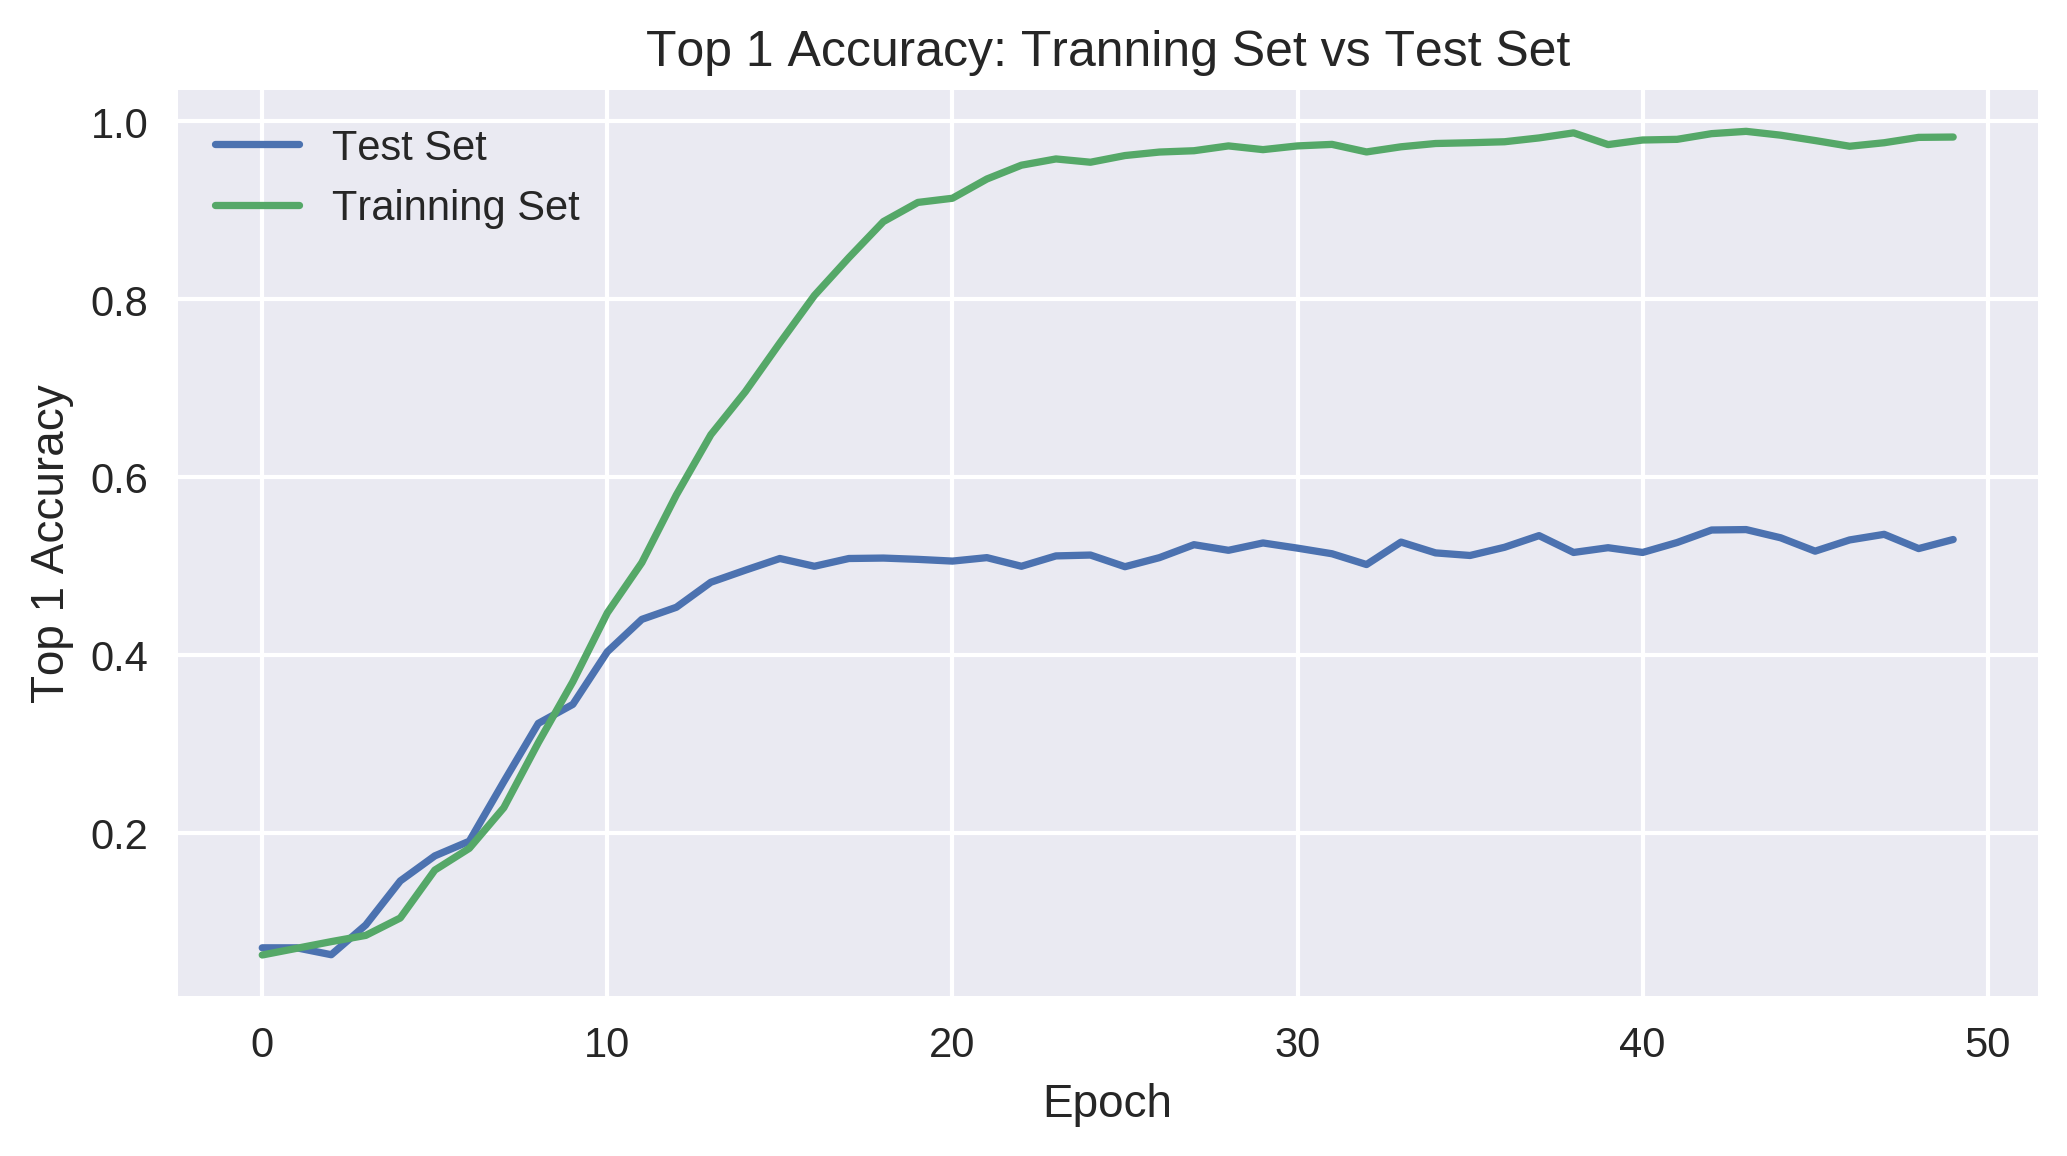

In [19]:
# plot metrics
plt.figure(figsize=(8, 4), dpi=300)
plt.title("Top 1 Accuracy: Tranning Set vs Test Set")
plt.xlabel("Epoch")
plt.ylabel("Top 1 Accuracy")
plt.plot(history.history['val_categorical_accuracy'], label="Test Set")
plt.plot(history.history['categorical_accuracy'], label="Trainning Set")
plt.legend()
plt.show()

### Plot Loss

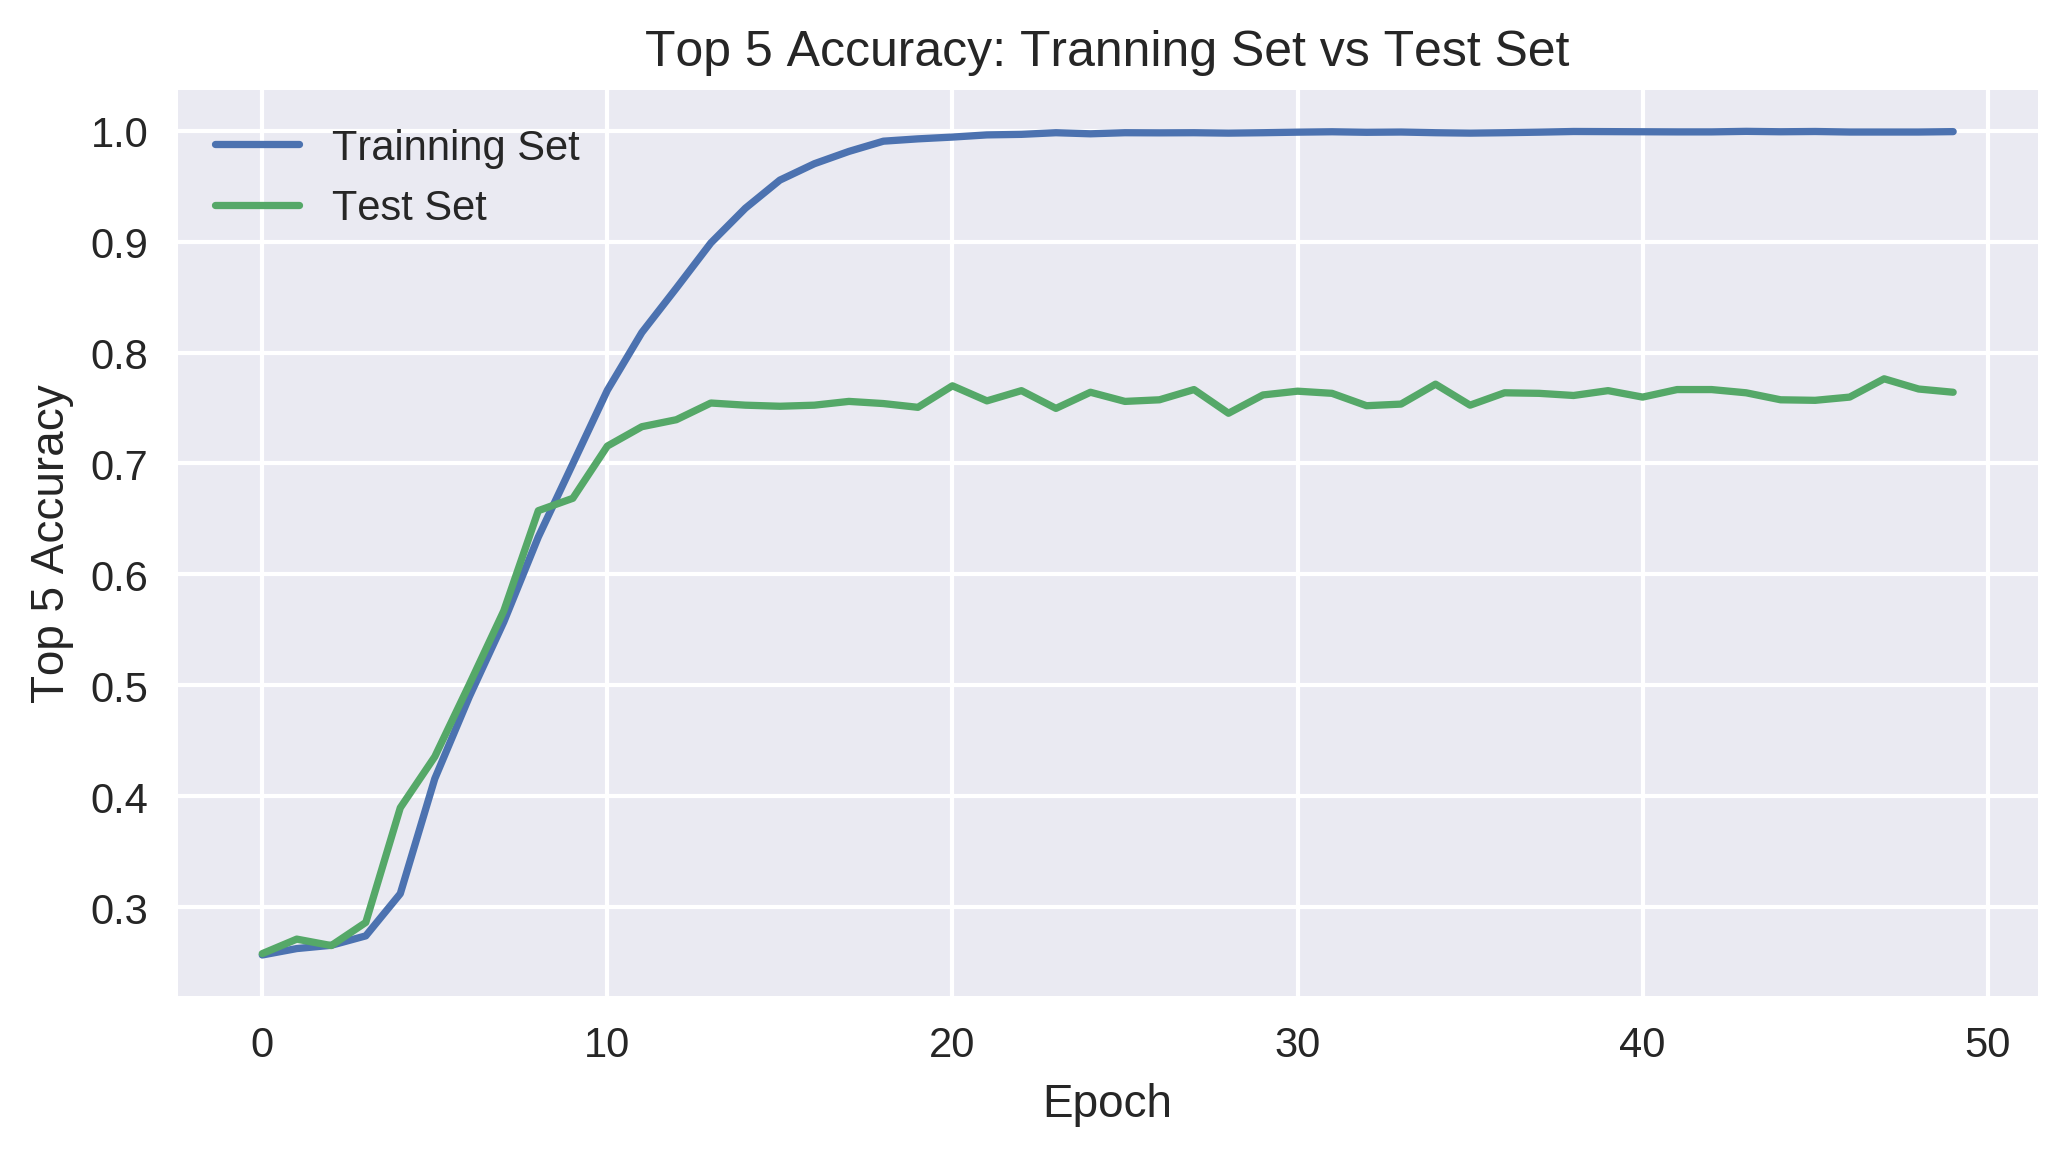

In [20]:
# plot metrics
plt.figure(figsize=(8, 4), dpi=300)
plt.title("Top 5 Accuracy: Tranning Set vs Test Set")
plt.xlabel("Epoch")
plt.ylabel("Top 5 Accuracy")
plt.plot(history.history['top_k_categorical_accuracy'], label="Trainning Set")
plt.plot(history.history['val_top_k_categorical_accuracy'], label="Test Set")
plt.legend()
plt.show()

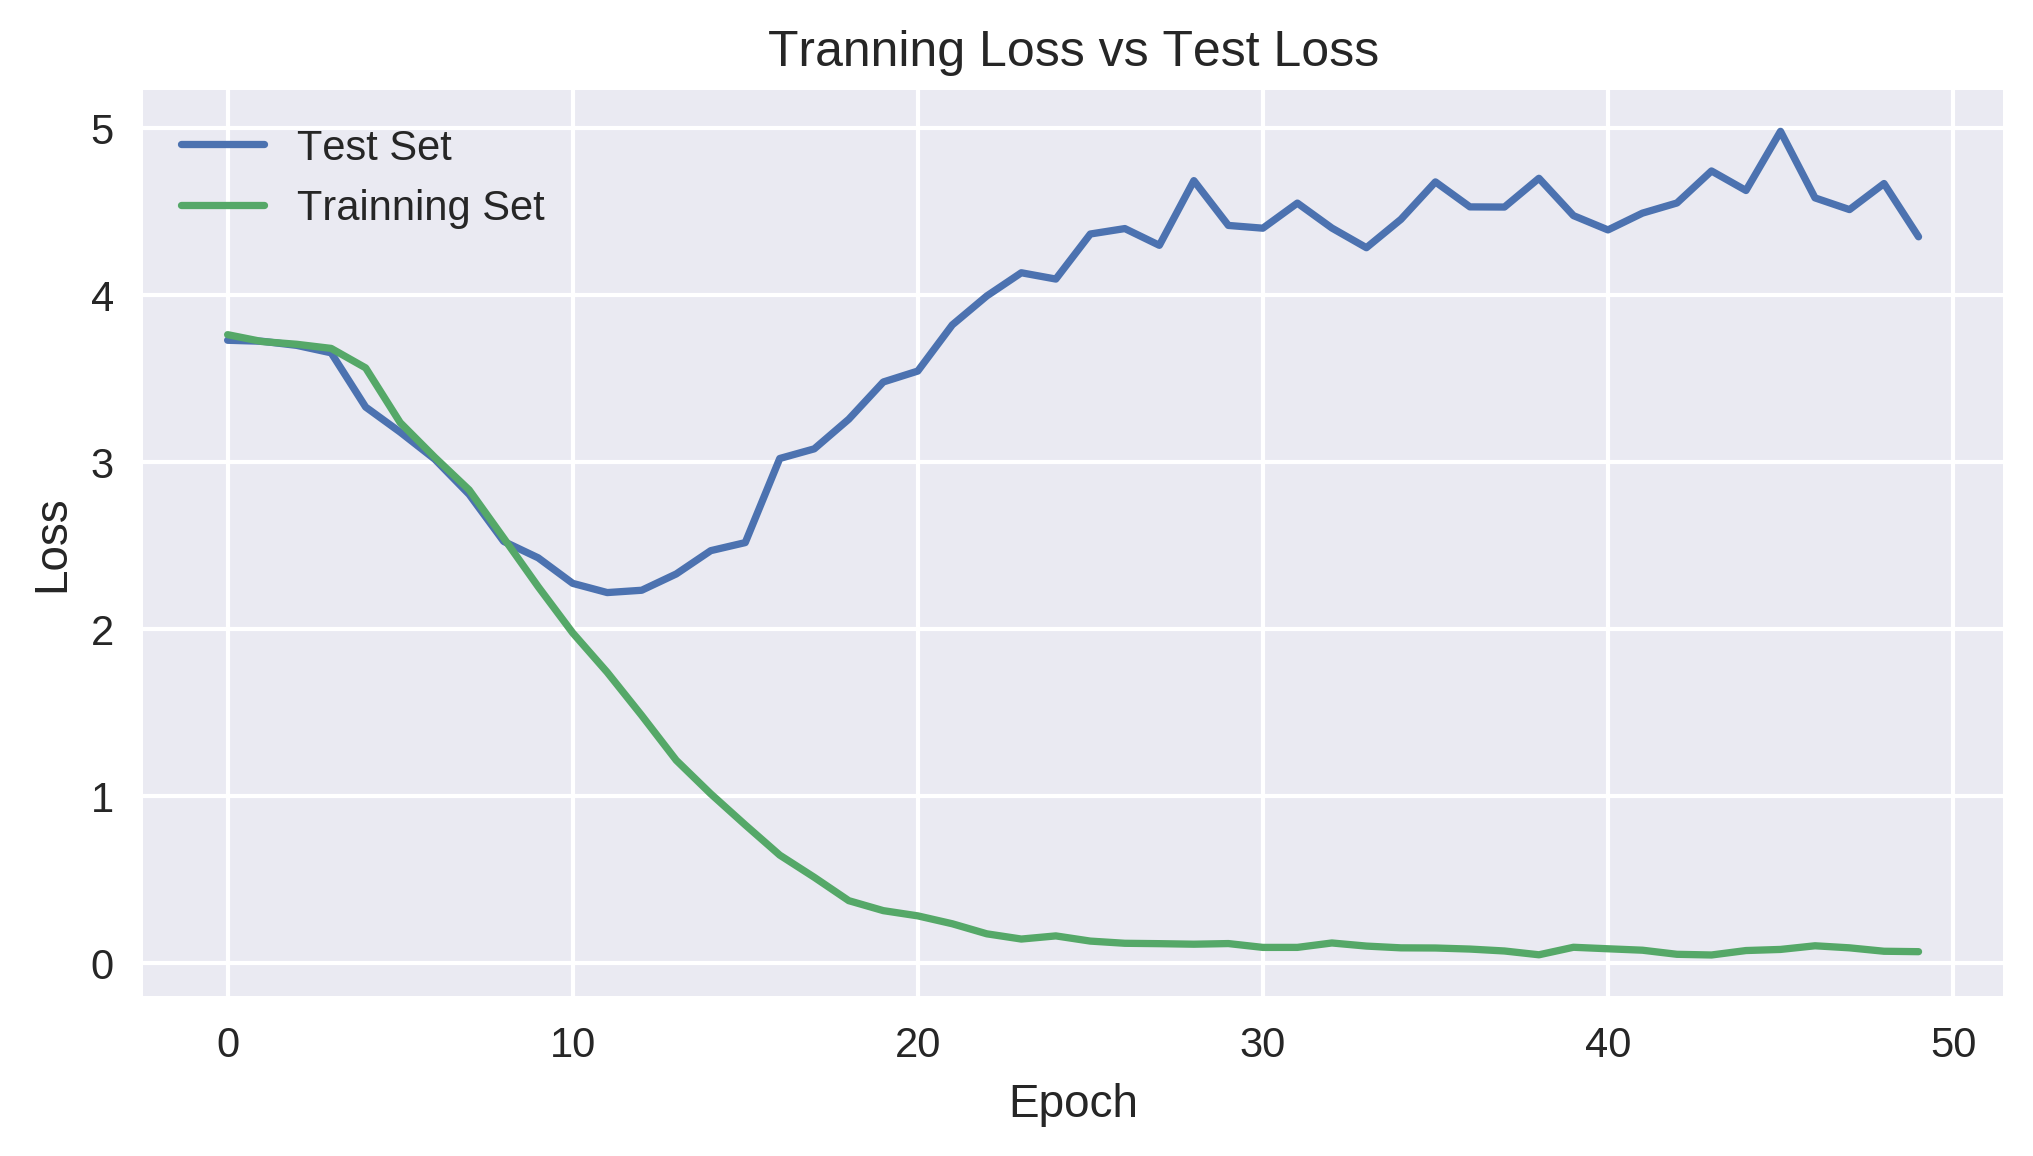

In [21]:
# plot metrics
plt.figure(figsize=(8, 4), dpi=300)
plt.title("Tranning Loss vs Test Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.plot(history.history['val_loss'], label="Test Set")
plt.plot(history.history['loss'], label="Trainning Set")
plt.legend()
plt.show()


### Save History

In [0]:
import pickle
  
f = open('ServeNet/trainHistoryServeNet-1-BI-LTSM-LeNet-(2048-1024)', 'wb')
pickle.dump(history.history, f)
f.close()
  

### Load History

In [0]:
import pickle

f = open('ServeNet/trainHistoryServeNet-1-BI-LTSM-LeNet-(2048-1024)', 'rb')
his = pickle.load(f)
f.close()

In [24]:
val_top_k = his['val_top_k_categorical_accuracy']
print(max(val_top_k))
print(np.argmax(val_top_k))
val_loss = his['val_loss']
print(min(val_loss))
print(np.argmin(val_loss))
val_ca = his['val_categorical_accuracy']
print(max(val_ca))
print(np.argmax(val_ca))

0.7763221737888472
47
2.2172205828741185
11
0.5409995149432427
43


### Model Save

In [0]:
#model.save('ServeNet/ServeNet-1-BI-LTSM-LeNet-(2048-1024).h5') 

### Model Load

In [0]:
#model = load_model('ServeNet/ServeNet-1-BI-LTSM-LeNet-(2048-1024).h5')

In [27]:
print("Training set:")
loss_train, mae_train, top5error_train = model.evaluate(X_train, Y_train)
print("Training accuracy = ", top5error_train)
print('Test set:')
loss_test, mae_test, top5error_test = model.evaluate(X_test, Y_test)
print("Training accuracy = ", top5error_test)

Training set:
8123/8123 [==============================] - 122s 15ms/step
Training accuracy =  0.999384463868029
Test set:
2061/2061 [==============================] - 31s 15ms/step
Training accuracy =  0.7641921397958318


In [0]:
# This code allows you to see the mislabelled examples
C = 50
# y_test_oh = np.eye(C)[Y_test.reshape(-1)]
# X_test_indices = sentences_to_indices(X_test, word_to_index, maxLen)
predY_test = model.predict(X_test)

In [29]:
print(predY_test.shape)
print(Y_test.shape)

(2061, 50)
(2061, 50)


In [30]:
print(np.argmax(predY_test[0]))
print(np.argmax(Y_test[0]))

46
21


In [31]:
# Heatmap Data
non_onehot_pred_test = np.argmax(predY_test, axis=1)
non_onehot_Y_test = np.argmax(Y_test, axis=1)
categories = ['Financial', 'Project Management', 'Banking', 'Backend', 'Shipping', 'File Sharing', 'Email', 'Mapping', 'Domains', 'Social', 'Weather', 'Storage', 'Tools', 'Games', 'Events', 'Security', 'Analytics', 'Travel', 'Data', 'Reference', 'Office', 'Medical', 'Photos', 'Images', 'Education', 'Cloud', 'Chat', 'Application Development', 'Database', 'Messaging', 'News Services', 'Advertising', 'eCommerce', 'Transportation', 'Government', 'Other', 'Music', 'Sports', 'Internet of Things', 'Science', 'Telephony', 'Stocks', 'Media', 'Entertainment', 'Payments', 'Real Estate', 'Bitcoin', 'Search', 'Enterprise', 'Video', 'All']

print(non_onehot_pred_test.shape)
print(non_onehot_Y_test.shape)


(2061,)
(2061,)


In [0]:
# Heat Map

# cross = pd.crosstab(non_onehot_Y_test, non_onehot_pred_test.reshape(len(non_onehot_pred_test),), rownames=['Actual'], colnames=['Predicted'], margins=True)
cross = pd.crosstab(non_onehot_Y_test, non_onehot_pred_test, rownames=['Actual'], colnames=['Predicted'], margins=True)  

In [33]:
cross.index = categories
cross.index.name = "Actual"
cross.columns = categories
cross.columns.name = "Predicted"
cross.head()

Predicted,Financial,Project Management,Banking,Backend,Shipping,File Sharing,Email,Mapping,Domains,Social,...,Stocks,Media,Entertainment,Payments,Real Estate,Bitcoin,Search,Enterprise,Video,All
Actual,,,,,,,,,,,,,,,,,,,,,
Financial,6,0,0,0,0,1,0,0,0,1,...,0,0,0,0,0,0,1,0,0,16
Project Management,0,24,0,0,0,3,0,0,0,4,...,0,0,0,0,0,0,0,1,0,41
Banking,0,1,26,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,2,0,39
Backend,0,0,0,6,0,0,0,0,0,0,...,0,0,0,0,0,3,0,0,0,16
Shipping,0,0,1,0,10,1,0,0,0,0,...,1,0,0,0,0,0,0,0,0,28


In [34]:
sns.load_dataset("flights").head()

,year,month,passengers
0,1949,January,112
1,1949,February,118
2,1949,March,132
3,1949,April,129
4,1949,May,121


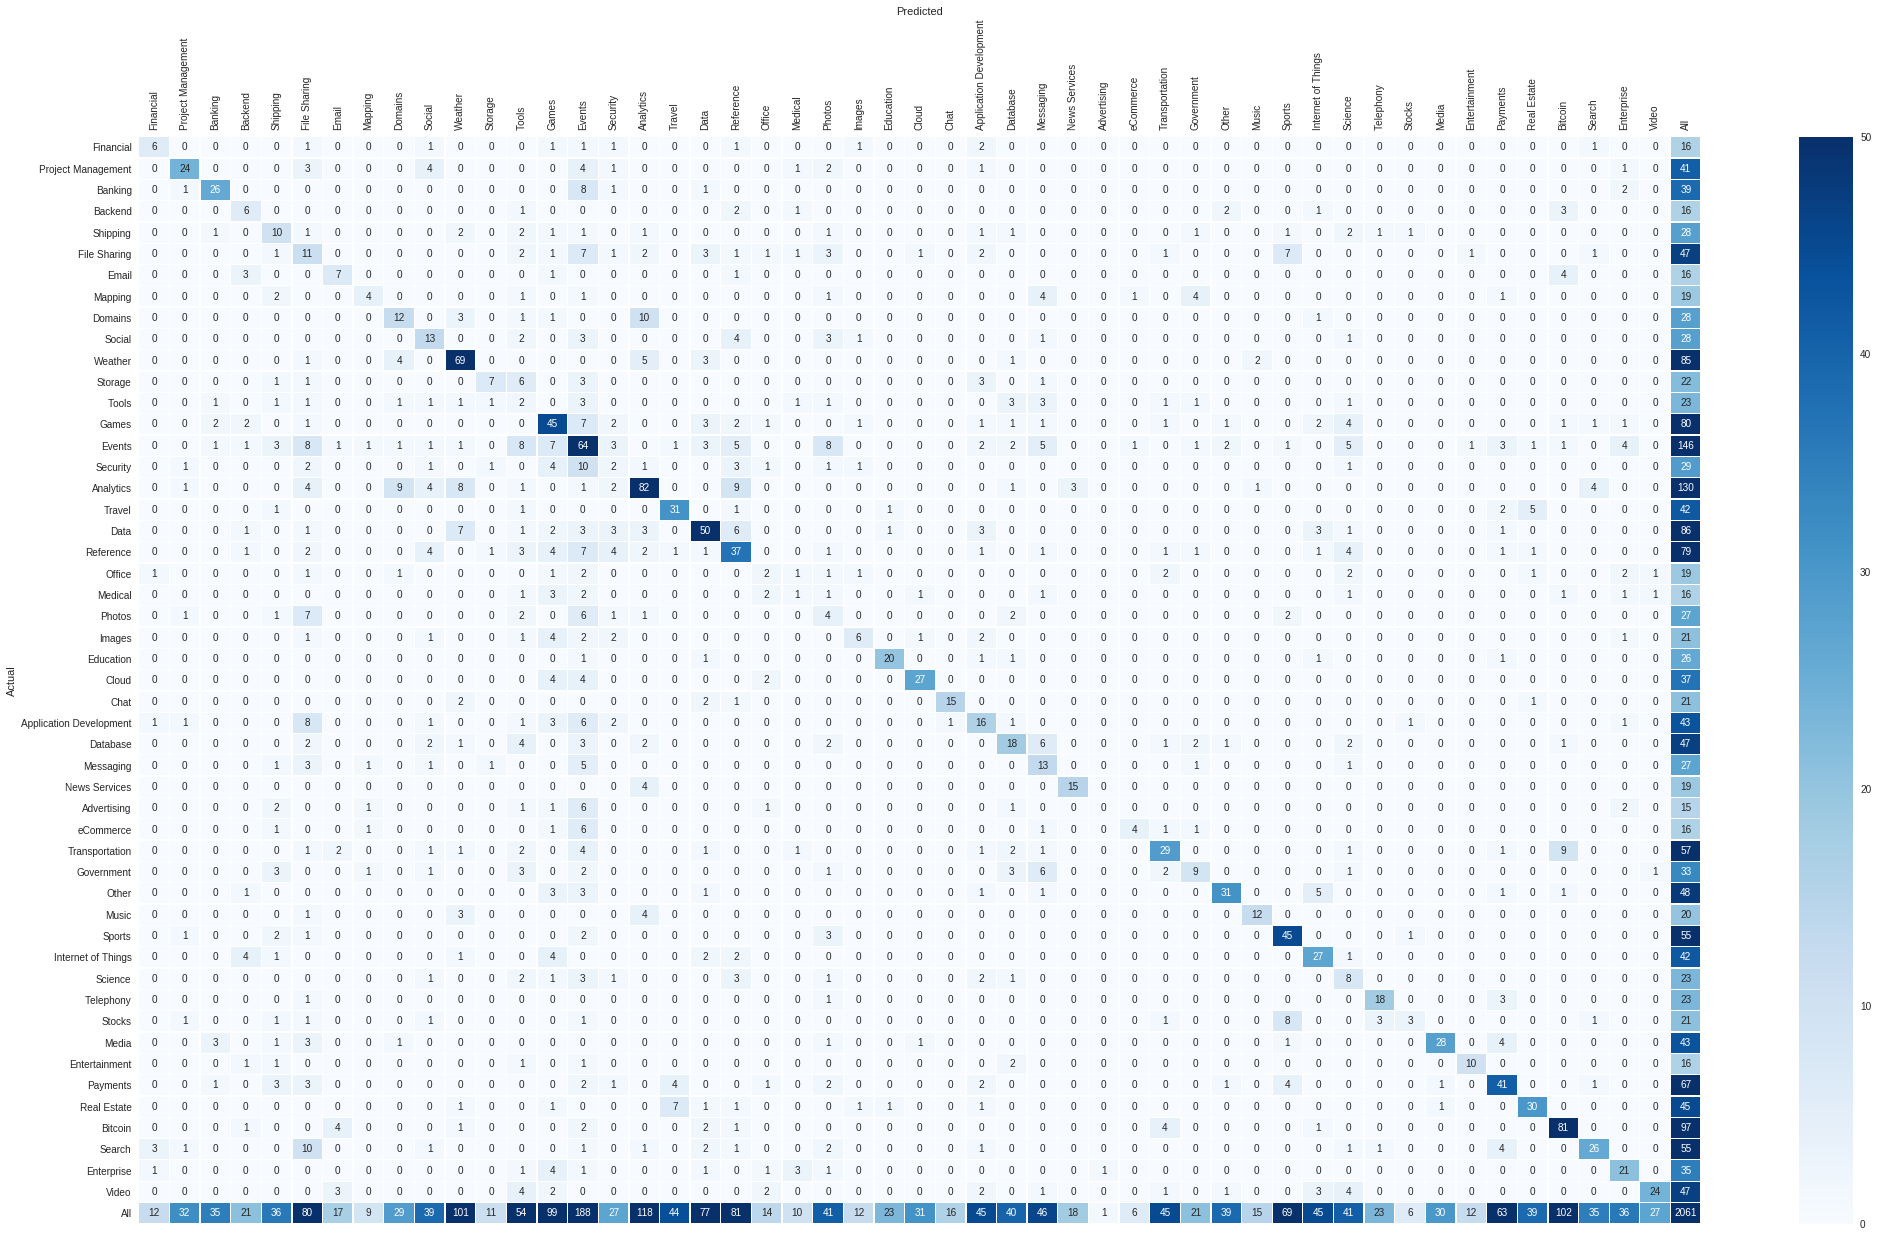

In [35]:
f, ax = plt.subplots(figsize=(35,20))

sns.heatmap(cross, annot=True, vmin=0, fmt="d", vmax=50, ax=ax, linewidths=.3, cmap=plt.cm.Blues)

ax.xaxis.tick_top()
ax.xaxis.set_label_position('top')


plt.yticks(rotation=0) 
plt.xticks(rotation=90) 

plt.savefig('ServeNet/ServeNet-1-BI-LTSM-LeNet-(4096-1024)-heatmap.pdf', format='pdf', dpi=300)